#DSML PROJECT
##TOPIC : CUSTOMER ANALYSIS

In [76]:
#IMPORTING DEPENCIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [77]:
#LOADING THE DATA INTO COLAB
Data = pd.read_csv ("/content/customer_train.csv")
Data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [78]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

In [79]:
Data.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,839.500000,839.500000,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,485.118542,485.118542,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,419.750000,419.750000,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,839.500000,839.500000,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1259.250000,1259.250000,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1679.000000,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [82]:
Data.shape

(1680, 33)

In [83]:
#SPENDING ON DIFFERENT ITEMS ARE ASSIGNED TO TOTAL SPENDINGS
Data['Total_Spending'] = Data[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
Data['Kids'] = Data['Kidhome'] + Data['Teenhome']
Data.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending,Kids
count,1680.000000,1680.000000,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000,1.680000e+03,1680.000000
mean,839.500000,839.500000,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,...,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048,6.039030e+05,0.952381
std,485.118542,485.118542,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,...,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243,6.017014e+05,0.763284
min,0.000000,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000e+03,0.000000
25%,419.750000,419.750000,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,6.900000e+04,0.000000
50%,839.500000,839.500000,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,3.915000e+05,1.000000
75%,1259.250000,1259.250000,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.035500e+06,1.000000
max,1679.000000,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2.525000e+06,3.000000


In [84]:
Data.shape

(1680, 33)

In [85]:
#checking skewness for each column
#select numeric columns for skewness
numeric_columns = Data.select_dtypes(include=['number'])
column_skewness = numeric_columns.skew()
print("skewness of each column : ")
print(column_skewness)

skewness of each column : 
Unnamed: 0.1           0.000000
Unnamed: 0             0.000000
ID                     0.047904
Year_Birth            -0.417470
Income                 0.399328
Kidhome                0.659528
Teenhome               0.472956
Recency               -0.002418
MntCoke                1.178938
MntFruits              2.137623
MntMeatProducts        2.124737
MntFishProducts        1.963198
MntSweetProducts       2.135253
MntGoldProds           1.875091
NumDealsPurchases      2.450231
NumWebPurchases        1.028178
NumCatalogPurchases    2.095426
NumStorePurchases      0.695964
NumWebVisitsMonth      0.258988
AcceptedCmp3           3.331176
AcceptedCmp4           3.246414
AcceptedCmp5           3.402587
AcceptedCmp1           3.618016
AcceptedCmp2           9.008715
Complain               9.798222
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               2.029234
Total_Spending         0.884676
Kids                   0.450451
dtype: float6

In [86]:
Data.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_Spending          0
Kids                    0
dtype: int64

In [87]:
#Handling missing data with median
Data['Income'].fillna(Data['Income'].median(), inplace=True)

In [88]:
Data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Total_Spending         0
Kids                   0
dtype: int64

In [89]:
#select categorical columns for label encoding
categorical_columns = ['Education' , 'Marital_Status']
label_encoder = LabelEncoder()
for column in categorical_columns :
  Data[column] = label_encoder.fit_transform(Data[column])
  print(Data.head())

   Unnamed: 0.1  Unnamed: 0    ID  Year_Birth  Education Marital_Status  \
0             0           0  5524        1957          1         Lajang   
1             1           1  2174        1954          1         Lajang   
2             2           2  4141        1965          1    Bertunangan   
3             3           3  6182        1984          1    Bertunangan   
4             4           4  5324        1981          3        Menikah   

       Income  Kidhome  Teenhome Dt_Customer  ...  AcceptedCmp4  AcceptedCmp5  \
0  58138000.0        0         0  04-09-2012  ...             0             0   
1  46344000.0        1         1  08-03-2014  ...             0             0   
2  71613000.0        0         0  21-08-2013  ...             0             0   
3  26646000.0        1         0  10-02-2014  ...             0             0   
4  58293000.0        1         0  19-01-2014  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Reve

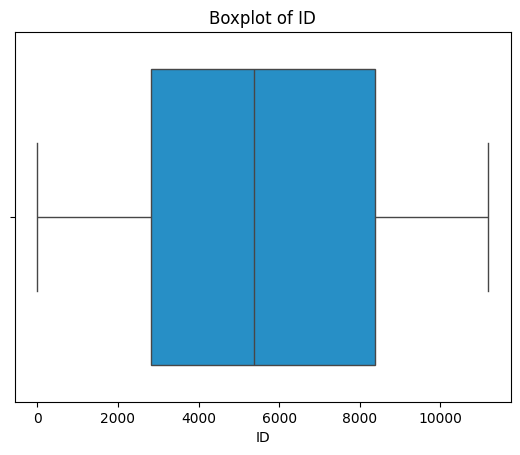

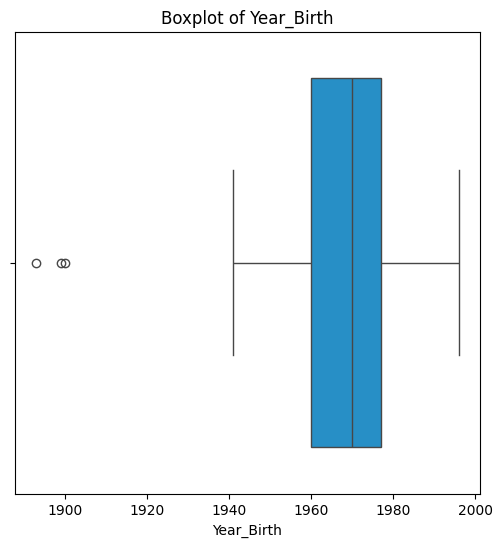

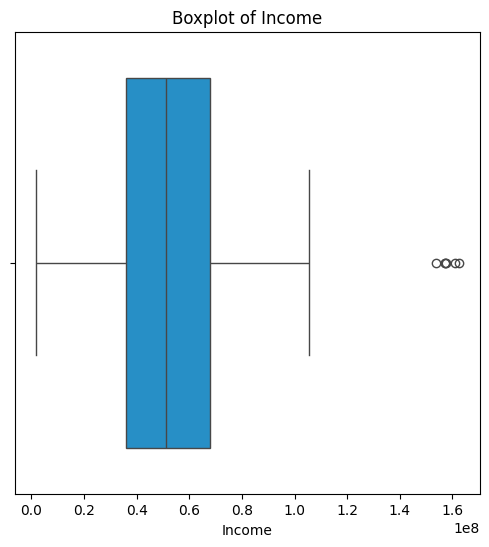

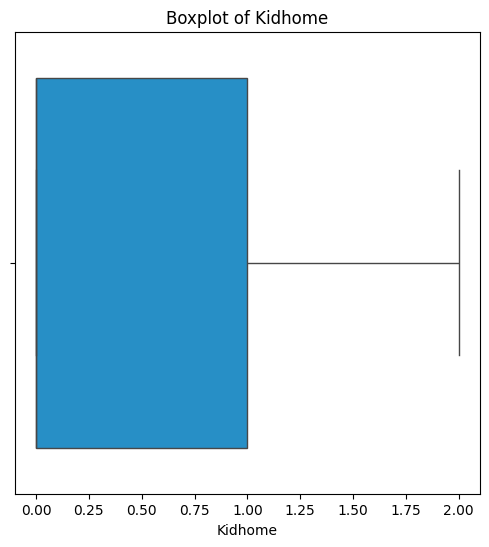

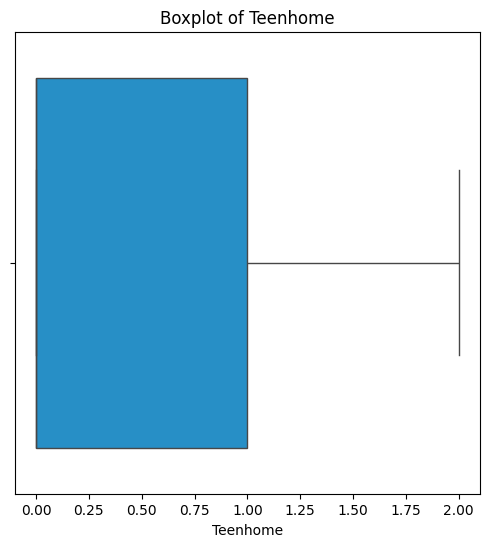

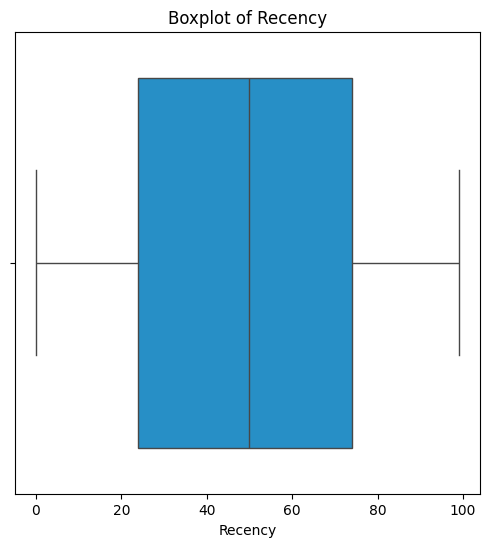

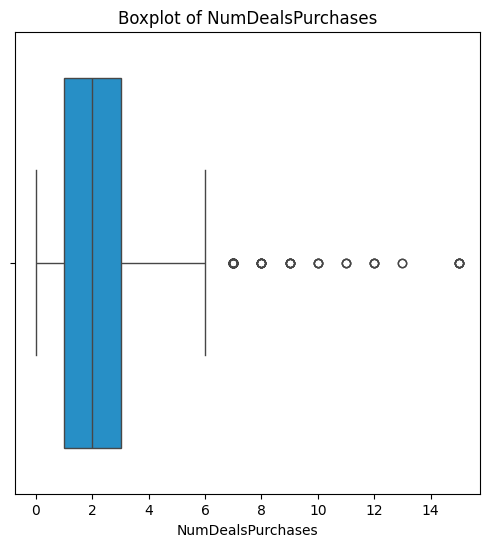

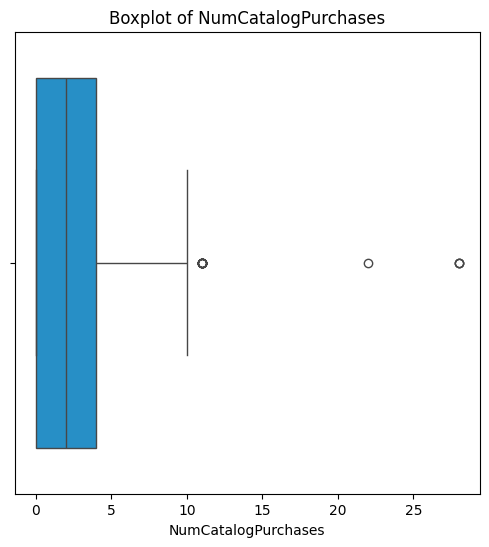

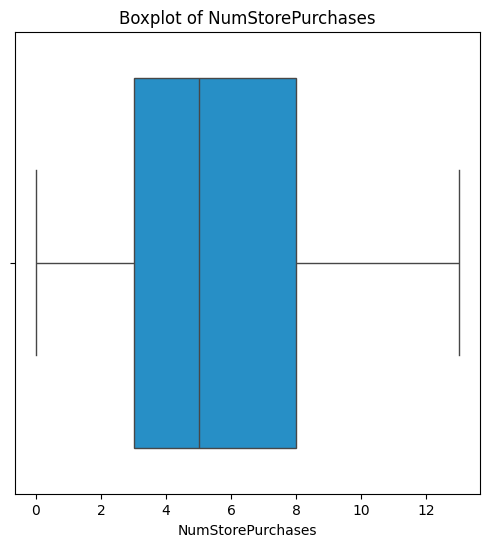

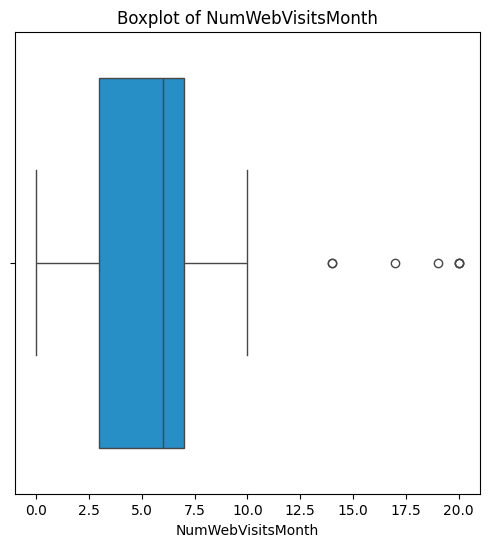

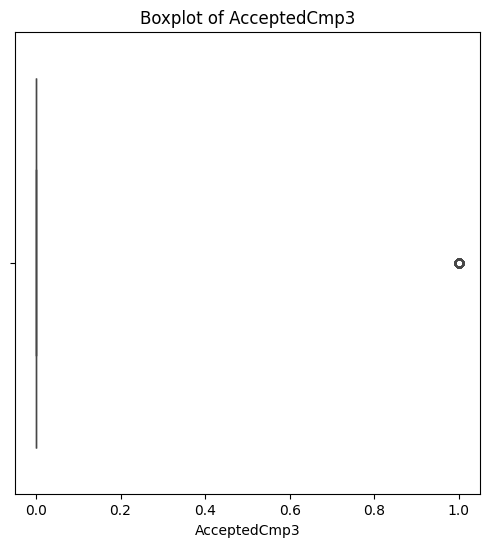

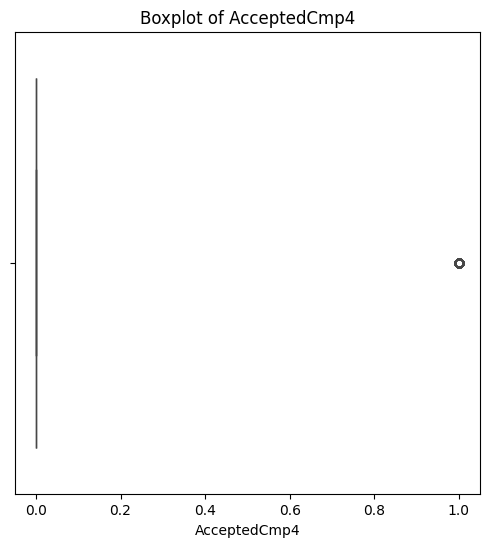

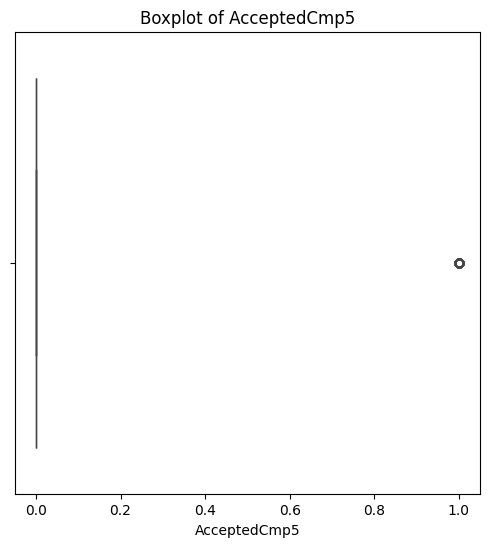

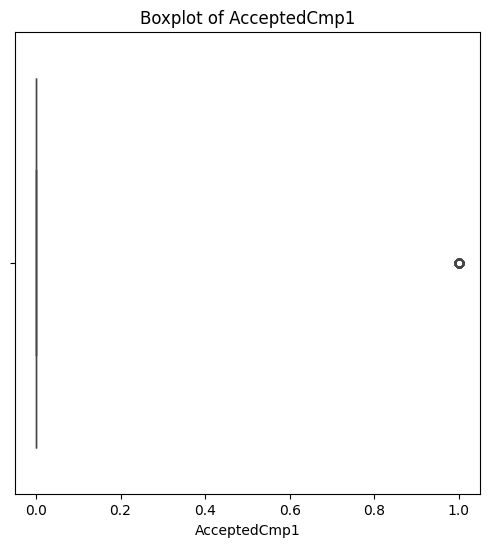

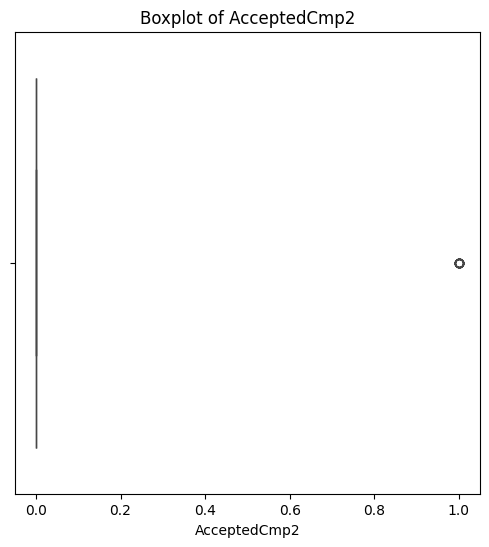

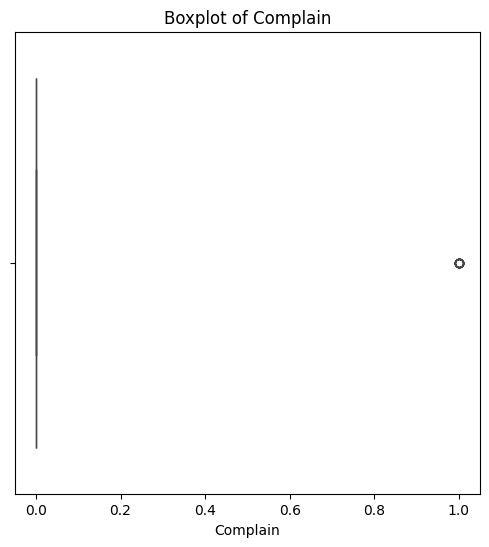

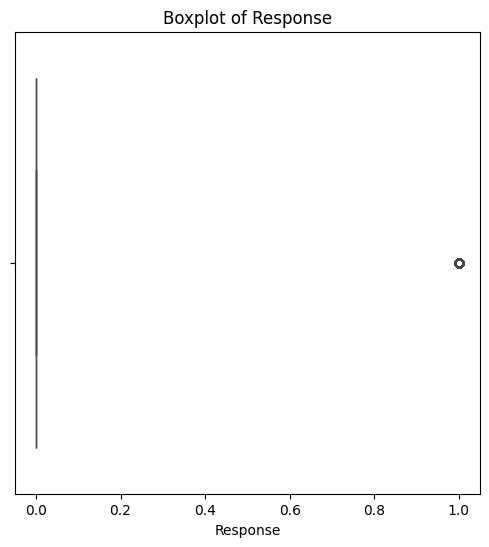

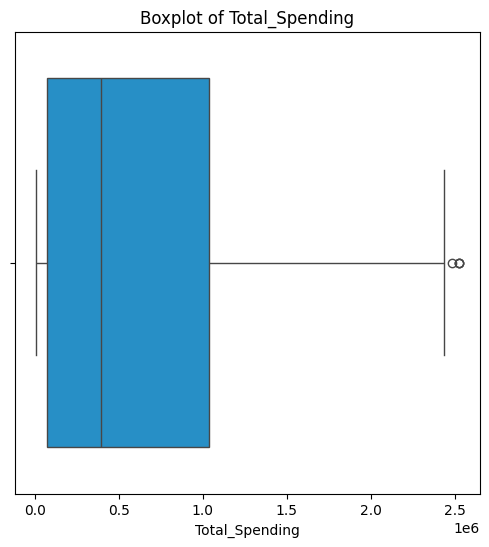

<Figure size 600x600 with 0 Axes>

In [90]:
#OUTLIER DETECTION USING BOXPLOT FOR NUMERICAL COLUMNS
n_columns = ['ID','Year_Birth','Income','Kidhome','Teenhome','Recency','NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response','Total_Spending']
for i in n_columns:
  sns.boxplot(x=Data[i], color = '#0d97e0')
  plt.title(f"Boxplot of {i}")
  plt.xlabel(i)
  plt.show()
  plt.figure(figsize=(6,6))

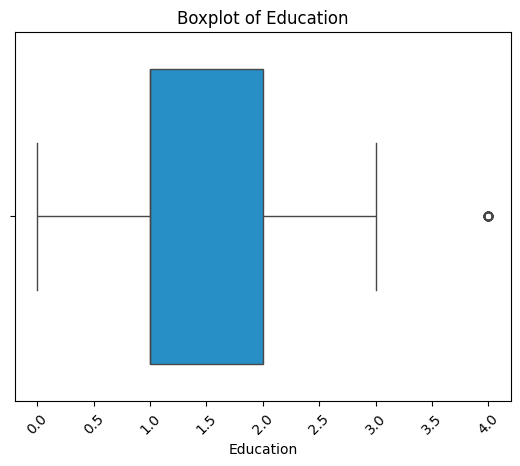

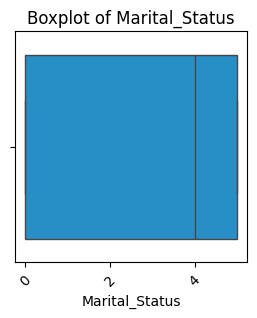

<Figure size 300x300 with 0 Axes>

In [91]:
#OUTLIER DETECTION FOR CATEGORICAL COLUMNS
c_columns = ['Education' , 'Marital_Status']
for i in c_columns:
  sns.boxplot(x=Data[i], color = '#0d97e0')
  plt.title(f"Boxplot of {i}")
  plt.xlabel(i)
  plt.xticks(rotation=45)
  plt.show()
  plt.figure(figsize=(3,3))

In [92]:
#remove outliers using z-score method(capping)
#finding the limits
#marital status
upper_limit = Data['Marital_Status'].mean() + 3*Data['Marital_Status'].std()
lower_limit = Data['Marital_Status'].mean() - 3*Data['Marital_Status'].std()
print("Lower limit = ",lower_limit)
print("Upper limit = ",upper_limit)


Lower limit =  -3.394648518880128
Upper limit =  9.381553280784889


In [93]:
#Education
upper_limit1 = Data['Education'].mean() + 3*Data['Education'].std()
lower_limit1 = Data['Education'].mean() - 3*Data['Education'].std()
print("Lower limit = ",lower_limit1)
print("Upper limit = ",upper_limit1)


Lower limit =  -1.4262957403058611
Upper limit =  4.582248121258242


In [94]:
Data.loc[Data['Marital_Status']> upper_limit,'Marital_Status'] = upper_limit
Data.loc[Data['Marital_Status']< lower_limit,'Marital_Status'] = lower_limit
Data.loc[Data['Education']> upper_limit1,'Education'] = upper_limit1
Data.loc[Data['Education']< lower_limit1,'Education'] = lower_limit1

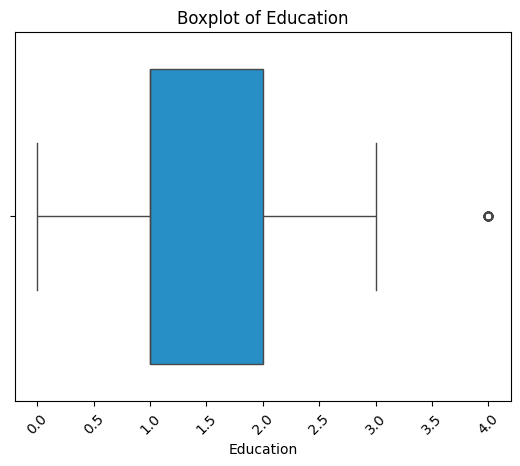

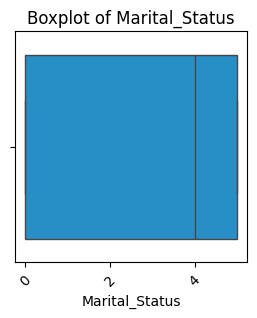

<Figure size 300x300 with 0 Axes>

In [95]:
c_columns = ['Education' , 'Marital_Status']
for i in c_columns:
  sns.boxplot(x=Data[i], color = '#0d97e0')
  plt.title(f"Boxplot of {i}")
  plt.xlabel(i)
  plt.xticks(rotation=45)
  plt.show()
  plt.figure(figsize=(3,3))

In [ ]:
#for numerical columns capping method

In [96]:
#limit for Total spendings
upper_limit2 = Data['Total_Spending'].mean() + 3*Data['Total_Spending'].std()
lower_limit2 = Data['Total_Spending'].mean() - 3*Data['Total_Spending'].std()
print("Lower limit = ",lower_limit2)
print("Upper limit = ",upper_limit2)

Lower limit =  -1201201.3309502976
Upper limit =  2409007.28333125


In [97]:
#limit for year birth
upper_limit3 = Data['Year_Birth'].mean() + 3*Data['Year_Birth'].std()
lower_limit3 = Data['Year_Birth'].mean() - 3*Data['Year_Birth'].std()
print("Lower limit = ",lower_limit3)
print("Upper limit = ",upper_limit3)

Lower limit =  1932.766041548379
Upper limit =  2004.929196546859


In [98]:
#limit for Income
upper_limit4 = Data['Income'].mean() + 3*Data['Income'].std()
lower_limit4 = Data['Income'].mean() - 3*Data['Income'].std()
print("Lower limit = ",lower_limit4)
print("Upper limit = ",upper_limit4)

Lower limit =  -12114138.266519941
Upper limit =  116127356.1236628


In [99]:
#limit for NumDealsPurchases
upper_limit5 = Data['NumDealsPurchases'].mean() + 3*Data['NumDealsPurchases'].std()
lower_limit5 = Data['NumDealsPurchases'].mean() - 3*Data['NumDealsPurchases'].std()
print("Lower limit = ",lower_limit5)
print("Upper limit = ",upper_limit5)

Lower limit =  -3.5596222448332417
Upper limit =  8.237003197214193


In [100]:
#limit for NumCatalogPurchases
upper_limit6 = Data['NumCatalogPurchases'].mean() + 3*Data['NumCatalogPurchases'].std()
lower_limit6 = Data['NumCatalogPurchases'].mean() - 3*Data['NumCatalogPurchases'].std()
print("Lower limit = ",lower_limit6)
print("Upper limit = ",upper_limit6)

Lower limit =  -6.247789482789769
Upper limit =  11.589456149456435


In [101]:
# limit for NumWebVisitsMonth
upper_limit7 = Data['NumWebVisitsMonth'].mean() + 3*Data['NumWebVisitsMonth'].std()
lower_limit7 = Data['NumWebVisitsMonth'].mean() - 3*Data['NumWebVisitsMonth'].std()
print("Lower limit = ",lower_limit7)
print("Upper limit = ",upper_limit7)


Lower limit =  -2.017298037241746
Upper limit =  12.68158375152746


In [102]:
Data.loc[Data['Total_Spending']> upper_limit3,'Total_Spending'] = upper_limit2
Data.loc[Data['Total_Spending']< lower_limit3,'Total_Spending'] = lower_limit2

Data.loc[Data['Year_Birth']> upper_limit3,'Year_Birth'] = upper_limit3
Data.loc[Data['Year_Birth']< lower_limit3,'Year_Birth'] = lower_limit3

Data.loc[Data['Income']> upper_limit4,'Income'] = upper_limit4
Data.loc[Data['Income']< lower_limit4,'Income'] = lower_limit4

Data.loc[Data['NumDealsPurchases']> upper_limit5,'NumDealsPurchases'] = upper_limit5
Data.loc[Data['NumDealsPurchases']< lower_limit5,'NumDealsPurchases'] = lower_limit5

Data.loc[Data['NumCatalogPurchases']> upper_limit6,'NumCatalogPurchases'] = upper_limit6
Data.loc[Data['NumCatalogPurchases']< lower_limit6,'NumCatalogPurchases'] = lower_limit6

Data.loc[Data['NumWebVisitsMonth']> upper_limit7,'NumWebVisitsMonth'] = upper_limit7
Data.loc[Data['NumWebVisitsMonth']< lower_limit7,'NumWebVisitsMonth'] = lower_limit7

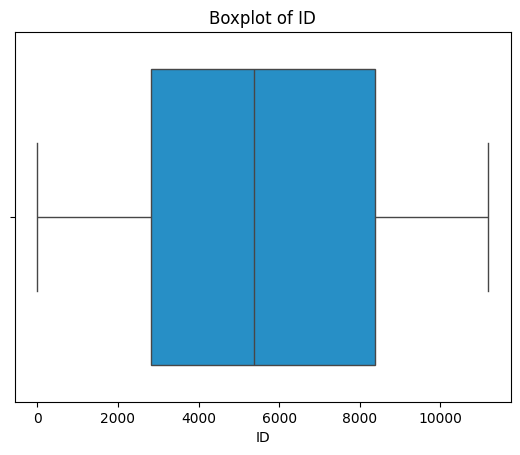

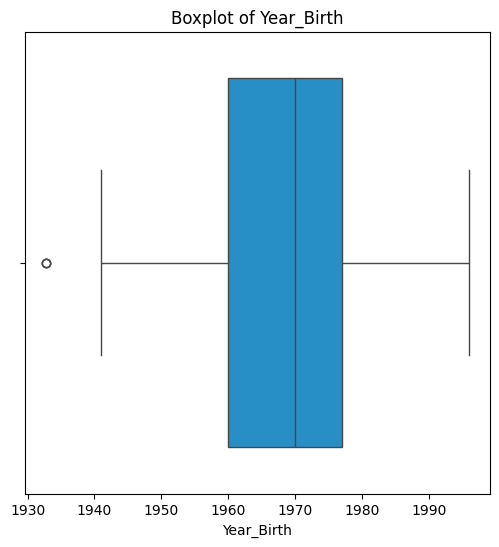

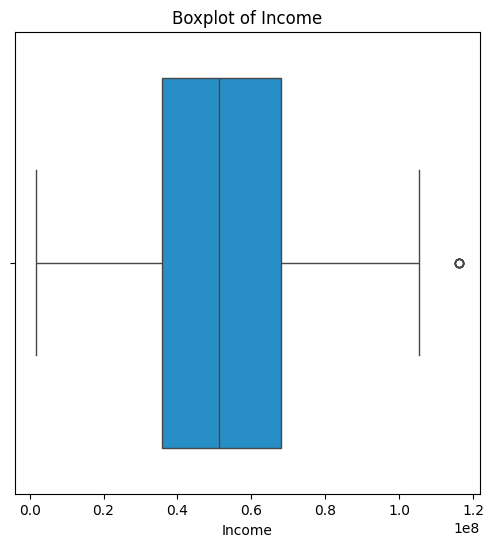

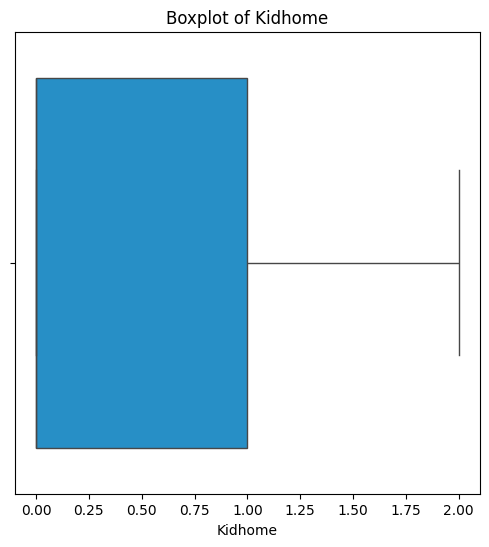

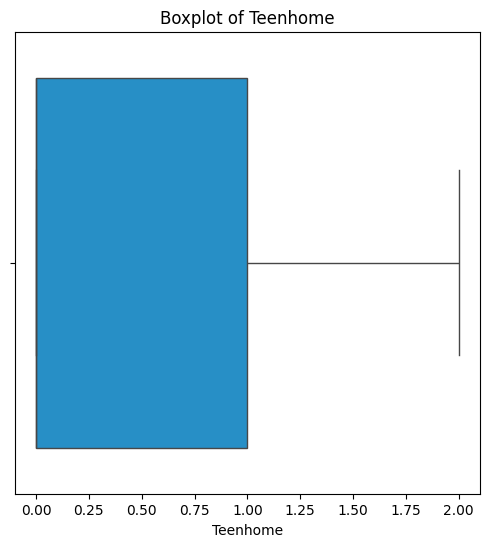

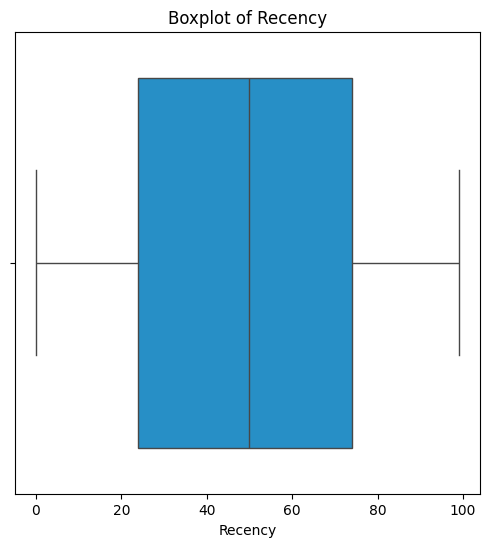

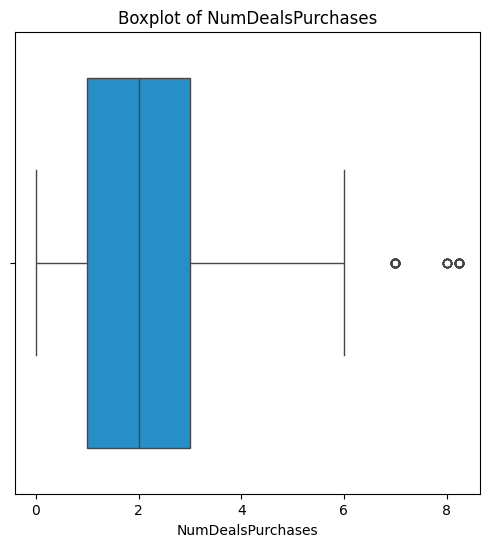

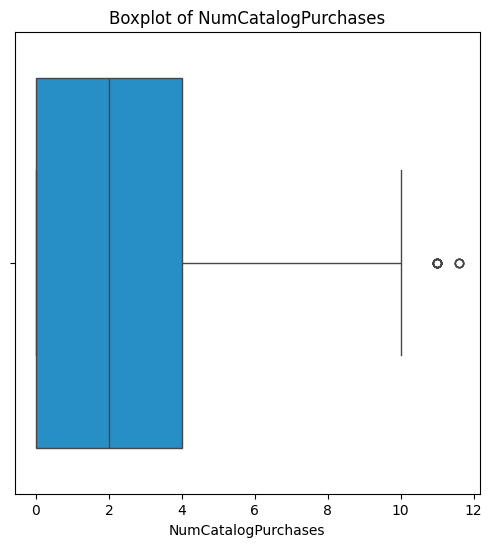

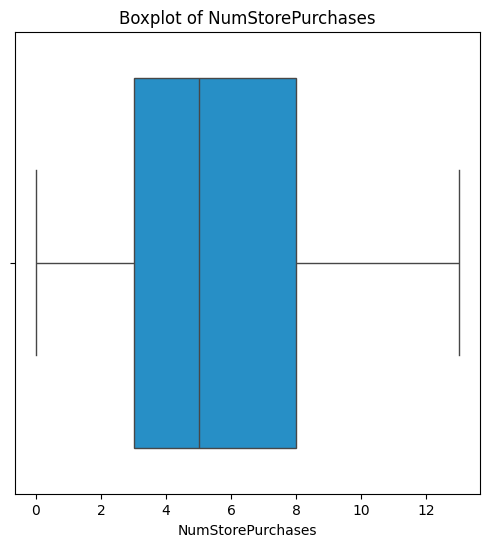

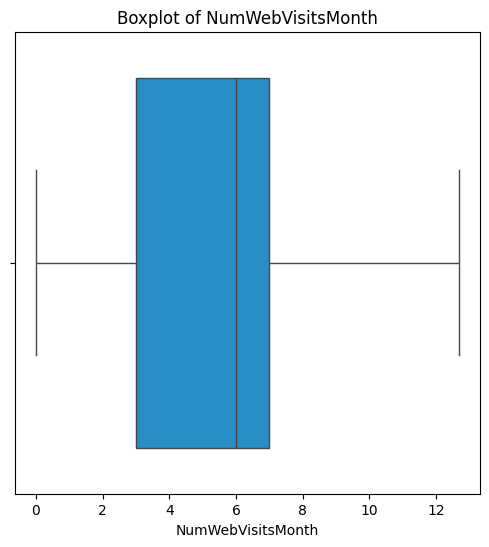

<Figure size 600x600 with 0 Axes>

In [103]:
n_columns = ['ID','Year_Birth','Income','Kidhome','Teenhome','Recency','NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
for i in n_columns:
  sns.boxplot(x=Data[i], color = '#0d97e0')
  plt.title(f"Boxplot of {i}")
  plt.xlabel(i)
  plt.show()
  plt.figure(figsize=(6,6))

In [104]:
# Convert 'Dt_Customer' column to datetime type
Data['Dt_Customer'] = pd.to_datetime(Data['Dt_Customer'], format='%d-%m-%Y')
# Define today's date (assuming it as the latest date in the dataset)
today_date = pd.to_datetime('today')
# Feature Engineering: Purchase History Aggregation
#Total spendings also calculated
total_amount_spent = Data.groupby('ID')[['MntCoke', 'MntFruits', 'MntMeatProducts',
                                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
## Calculate average purchase amount by each customer
average_purchase_amount = Data.groupby('ID')[['MntCoke', 'MntFruits', 'MntMeatProducts',
                                             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Calculate frequency of purchases by each customer
purchase_frequency = Data.groupby('ID').size()
# Calculate recency of purchases by each customer
recency_of_purchases = (today_date - Data.groupby('ID')['Dt_Customer'].max()).dt.days
# Merge the engineered features into a single DataFrame
customer_features = pd.DataFrame({
   'Total spendings ' : total_amount_spent.sum(axis=1),
    'Average_Purchase_Amount': average_purchase_amount.mean(axis=1),
    'Purchase_Frequency': purchase_frequency,
    'Recency_of_Purchases': recency_of_purchases
})
# Display the engineered features
print(customer_features.head())

    Total spendings   Average_Purchase_Amount  Purchase_Frequency  \
ID                                                                  
0            1198000            199666.666667                   1   
1             577000             96166.666667                   1   
9             120000             20000.000000                   1   
13             32000              5333.333333                   1   
20            183000             30500.000000                   1   

    Recency_of_Purchases  
ID                        
0                   4000  
1                   3593  
9                   4259  
13                  3921  
20                  3880  


In [105]:
# Total number of campaigns accepted by each customer
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
Data['Total_Campaigns_Accepted'] = Data[campaign_columns].sum(axis=1)
print(Data.head())

   Unnamed: 0.1  Unnamed: 0    ID  Year_Birth  Education  Marital_Status  \
0             0           0  5524      1957.0        1.0             4.0   
1             1           1  2174      1954.0        1.0             4.0   
2             2           2  4141      1965.0        1.0             0.0   
3             3           3  6182      1984.0        1.0             0.0   
4             4           4  5324      1981.0        3.0             5.0   

       Income  Kidhome  Teenhome Dt_Customer  ...  AcceptedCmp5  AcceptedCmp1  \
0  58138000.0        0         0  2012-09-04  ...             0             0   
1  46344000.0        1         1  2014-03-08  ...             0             0   
2  71613000.0        0         0  2013-08-21  ...             0             0   
3  26646000.0        1         0  2014-02-10  ...             0             0   
4  58293000.0        1         0  2014-01-19  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Res

In [106]:
#LISTOUT UNWANTED COLUMNS
unwanted_columns = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts' , 'MntSweetProducts', 'MntGoldProds' ,'Z_CostContact' , 'Z_Revenue','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Kidhome','Teenhome']

In [107]:
#REMOVE UNWANTED COLUMNS
Data.drop(columns = unwanted_columns, inplace=True)

In [108]:
Data.shape

(1680, 19)

In [109]:
#SCALING
# Select numerical columns for scaling
numerical_columns = ['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                     'NumStorePurchases', 'NumWebVisitsMonth']
# Create a scaler object
scaler = StandardScaler()
# Fit the scaler to the numerical data and transform it
Data[numerical_columns] = scaler.fit_transform(Data[numerical_columns])
print(Data.head())

   Unnamed: 0.1  Unnamed: 0    ID  Year_Birth  Education  Marital_Status  \
0             0           0  5524      1957.0        1.0             4.0   
1             1           1  2174      1954.0        1.0             4.0   
2             2           2  4141      1965.0        1.0             0.0   
3             3           3  6182      1984.0        1.0             0.0   
4             4           4  5324      1981.0        3.0             5.0   

     Income Dt_Customer   Recency  NumDealsPurchases  NumWebPurchases  \
0  0.302609  2012-09-04  0.308300           0.410596         1.481285   
1 -0.265546  2014-03-08 -0.383214          -0.165757        -1.137857   
2  0.951743  2013-08-21 -0.798123          -0.742111         1.481285   
3 -1.214463  2014-02-10 -0.798123          -0.165757        -0.763694   
4  0.310076  2014-01-19  1.553026           1.563303         0.358796   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0             2.662214        

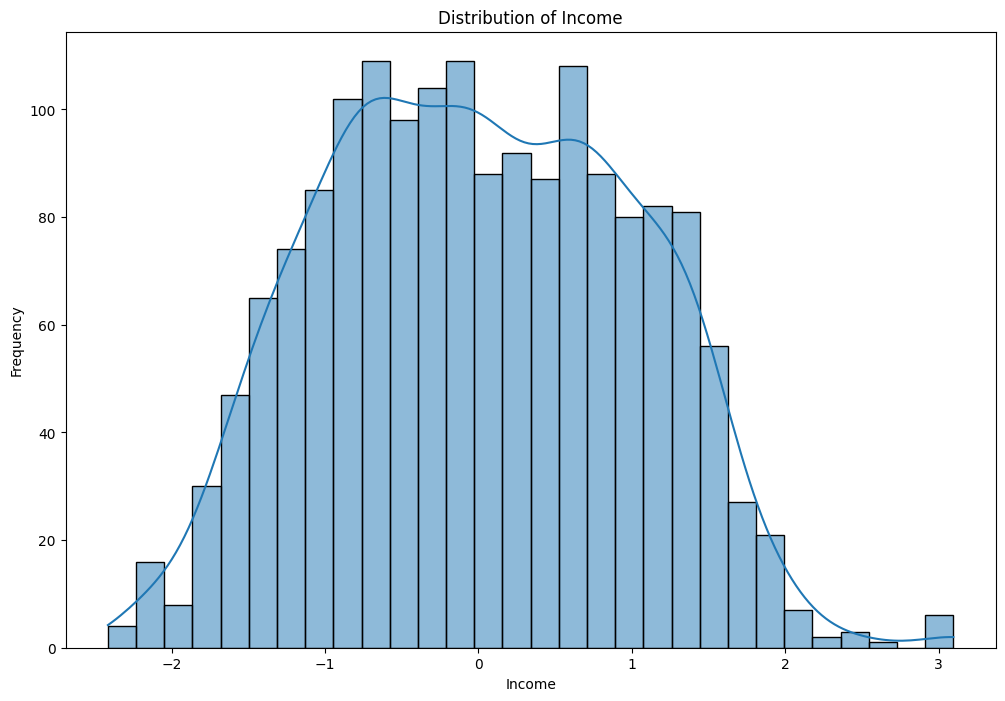

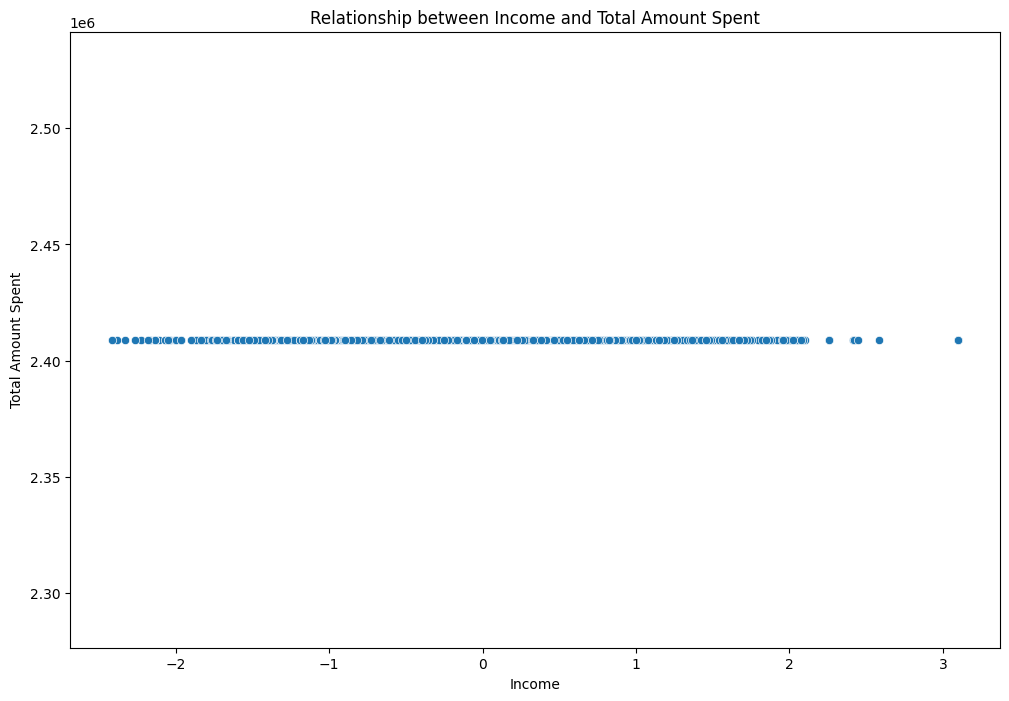

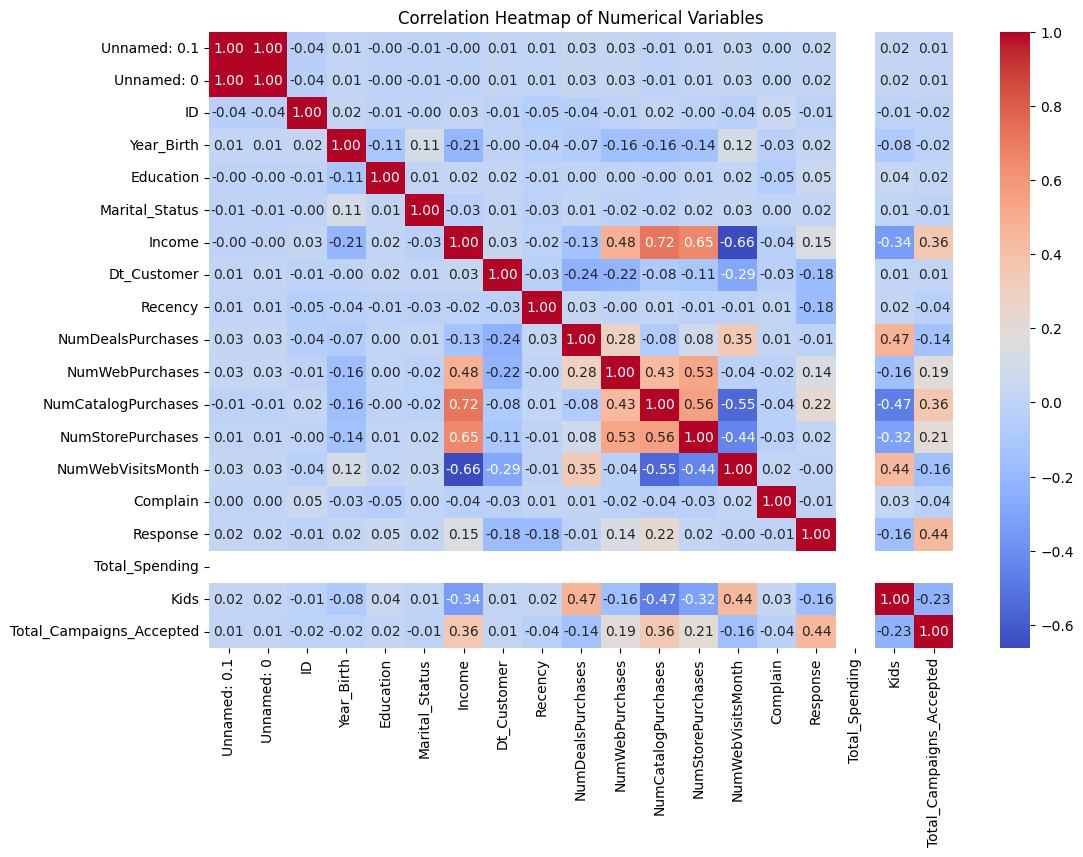

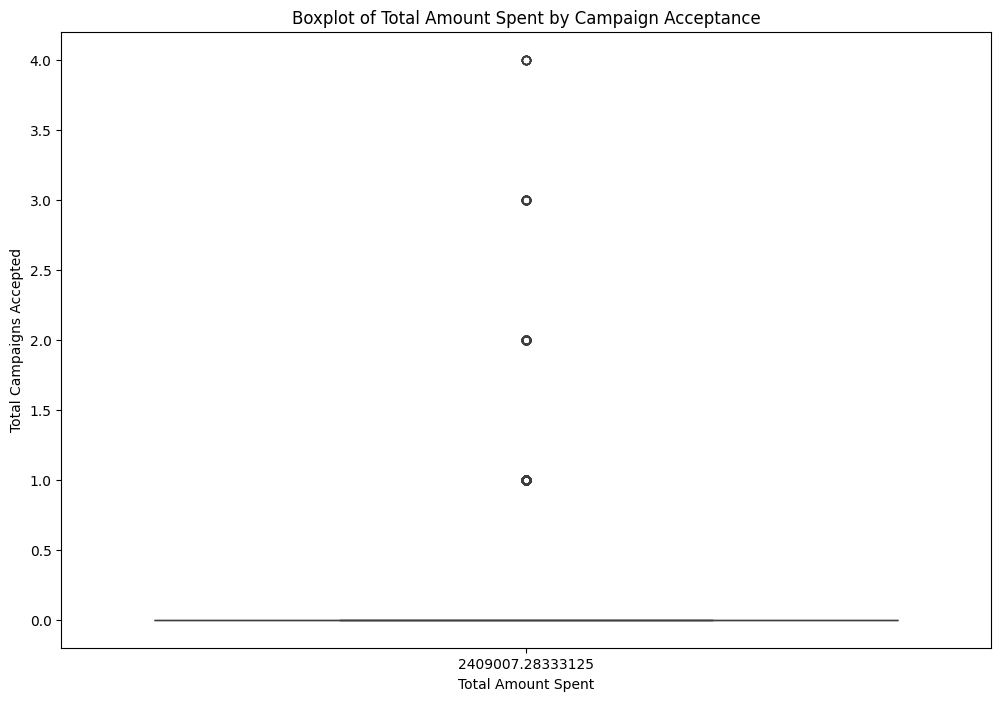

In [110]:
#EXPLORATORY DATA ANALYSIS
# Distribution of numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(data=Data, x='Income', bins=30, kde=True)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# Relationship between income and total amount spent
plt.figure(figsize=(12, 8))
sns.scatterplot(data=Data, x='Income', y='Total_Spending')
plt.title("Relationship between Income and Total Amount Spent")
plt.xlabel("Income")
plt.ylabel("Total Amount Spent")
plt.show()

# Correlation heatmap of numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Boxplot of total amount spent by campaign acceptance
plt.figure(figsize=(12, 8))
sns.boxplot(data=Data, x='Total_Spending', y='Total_Campaigns_Accepted')
plt.title("Boxplot of Total Amount Spent by Campaign Acceptance")
plt.xlabel("Total Amount Spent")
plt.ylabel("Total Campaigns Accepted")
plt.show()


In [111]:
from sklearn.metrics import confusion_matrix

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting Machines': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB()
}

# Split data into features and target variable
X = customer_features
y = Data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_accuracy = 0

# Perform grid search and evaluate models
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid={}, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Update best model if current model has higher accuracy
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

# Print the best model
print("\nBest Model:")
print(best_model)
print(f"Best Accuracy: {best_accuracy}")

Model: Logistic Regression
Accuracy: 0.8690476190476191
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       292
           1       0.00      0.00      0.00        44

    accuracy                           0.87       336
   macro avg       0.43      0.50      0.46       336
weighted avg       0.76      0.87      0.81       336

Confusion Matrix:
[[292   0]
 [ 44   0]]
Model: Decision Tree
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       292
           1       0.07      0.07      0.07        44

    accuracy                           0.75       336
   macro avg       0.46      0.46      0.46       336
weighted avg       0.75      0.75      0.75       336

Confusion Matrix:
[[249  43]
 [ 41   3]]
Model: Random Forest
Accuracy: 0.8184523809523809
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       292
           1 

In [112]:
# Clustering model
X_clustering = Data.drop(['Response', 'Dt_Customer'], axis=1)  # Exclude 'Dt_Customer' from clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters as needed
kmeans.fit(X_clustering)
Data['Cluster'] = kmeans.labels_

# Analysis of Clusters
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_clustering.columns)  # Don't need to perform inverse transformation
print("Cluster Centers:")
print(cluster_centers)

cluster_counts = Data['Cluster'].value_counts().sort_index()
print("\nCluster Counts:")
print(cluster_counts)

Cluster Centers:
   Unnamed: 0.1  Unnamed: 0           ID   Year_Birth  Education  \
0    825.992537  825.992537  6857.925373  1969.205886   1.592040   
1    796.561321  796.561321  9827.445755  1969.247090   1.533019   
2    893.640449  893.640449  4159.555056  1968.633708   1.622472   
3    838.383863  838.383863  1350.070905  1968.574000   1.562347   

   Marital_Status    Income   Recency  NumDealsPurchases  NumWebPurchases  \
0        2.912935 -0.023102  0.043822           0.006554         0.006040   
1        3.068396  0.051593 -0.088261          -0.029573        -0.016250   
2        2.847191  0.007695  0.006753          -0.058699         0.042649   
3        3.154034 -0.039150  0.041078           0.088082        -0.035494   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0            -0.027339          -0.015558          -0.003935  0.014925   
1             0.018934           0.018422          -0.056603  0.016509   
2             0.081603           0

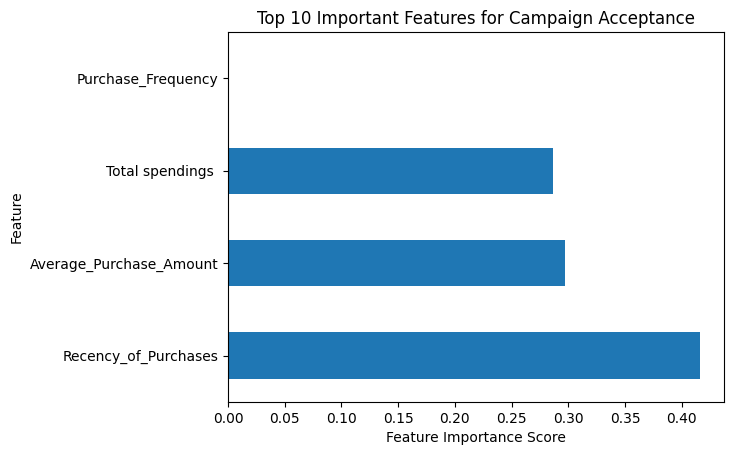

In [113]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features for Campaign Acceptance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

# Analyze characteristics of customers who accepted the campaign
accepted_customers = Data[Data['Total_Campaigns_Accepted'] == 1]


In [114]:
# Calculate total campaigns accepted per cluster
total_campaigns_per_cluster = Data.groupby('Cluster')['Total_Campaigns_Accepted'].sum()
print("\nTotal Campaigns Accepted per Cluster:")
print(total_campaigns_per_cluster)


Total Campaigns Accepted per Cluster:
Cluster
0    115
1    114
2    139
3    118
Name: Total_Campaigns_Accepted, dtype: int64


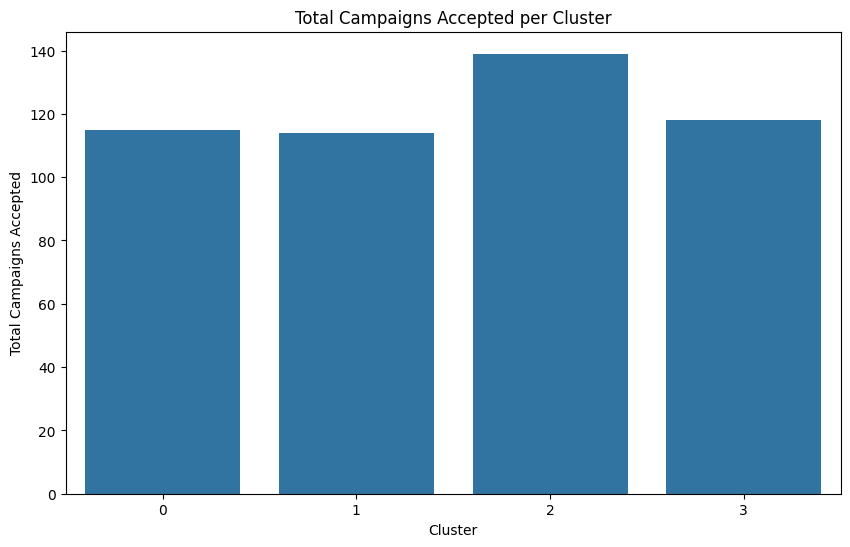

In [115]:
# Plotting the relationship between total campaigns accepted and cluster characteristics
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Total_Campaigns_Accepted', data=Data, estimator=sum, ci=None)
plt.title('Total Campaigns Accepted per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Campaigns Accepted')
plt.show()

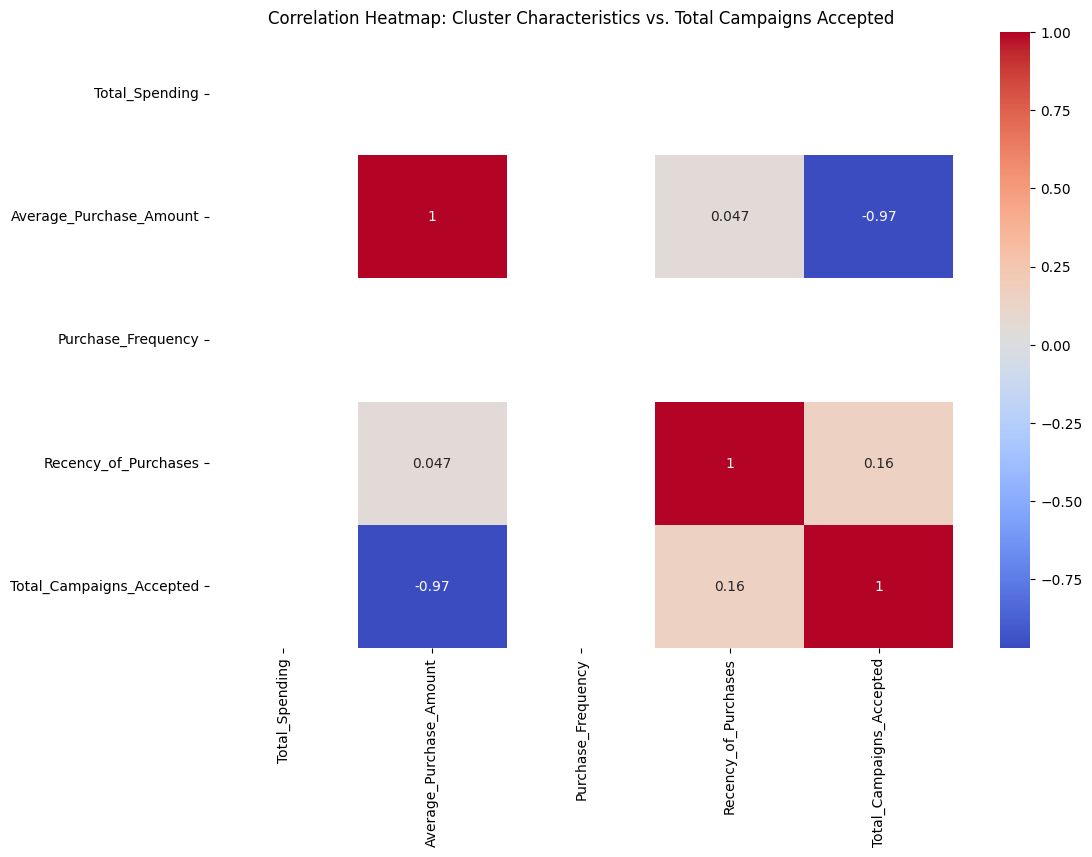

In [117]:
# Calculate the mean of clustering features for each cluster
Data = pd.concat([Data, customer_features], axis=1)

cluster_means = Data.groupby('Cluster').mean()

# Visualize the relationship between total campaigns accepted and cluster characteristics
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means[['Total_Spending', 'Average_Purchase_Amount', 'Purchase_Frequency', 'Recency_of_Purchases', 'Total_Campaigns_Accepted']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Cluster Characteristics vs. Total Campaigns Accepted')
plt.show()